<a href="https://colab.research.google.com/github/V-Meenakshi/TitanicSurvival/blob/main/Titanic_Survival_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITANIC SURVIVAL PREDICTION**

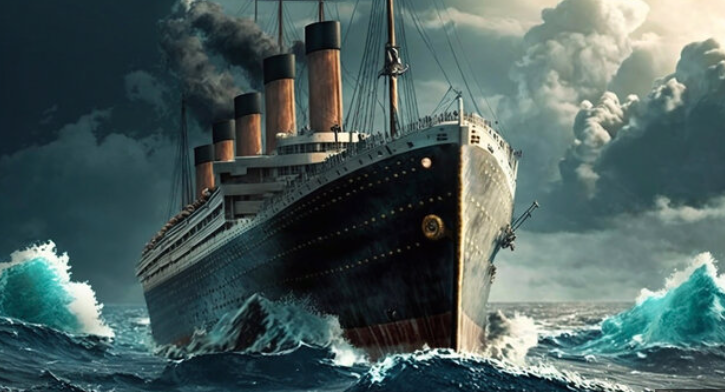

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#this is optional import used to ignore the unnecessary warnings

In [ ]:
df = pd.read_csv("/content/titanic_train.csv")
# importing the data set and creating data frames

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.drop('Cabin', axis = 1)

In [ ]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
#select_dtypesdf.describe()
#this will describe only the numerical data - to select the dtype of certain and then we can create list using tolist()
object_col = df.select_dtypes(include = 'object').columns.tolist()
numeric_col = df.select_dtypes(include = ['int', 'float']).columns.tolist()
print("object columns : ", object_col)
print("numeric columns : ", numeric_col)

object columns :  ['Sex', 'Embarked']
numeric columns :  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
#the numerical data is filled with the mean
for feature in numeric_col:
  df[feature].fillna(df[feature].mean(), inplace = True)

#where the categorical data will be filled with mode
for feature in object_col:
  df[feature].fillna(df[feature].mode()[0], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [ ]:
#this will return the unique value in the object-col
for i in object_col:
  print(i, "\n", df[i].unique())
  print()

Sex 
 ['male' 'female']

Embarked 
 ['S' 'C' 'Q']



In [ ]:
#this will return the unique value in the object-col
for i in object_col:
  print(i, "\n", df[i].value_counts())
  print()

Sex 
 male      577
female    314
Name: Sex, dtype: int64

Embarked 
 S    646
C    168
Q     77
Name: Embarked, dtype: int64



counter plot :  Sex


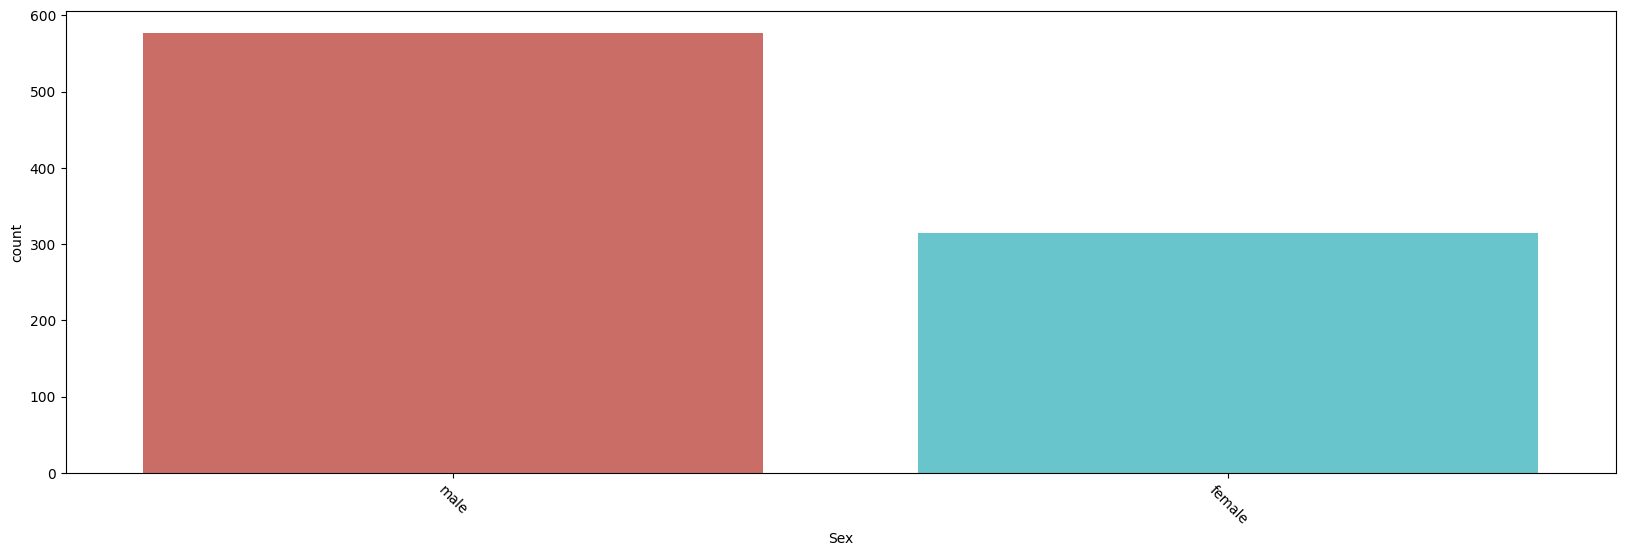



counter plot :  Embarked


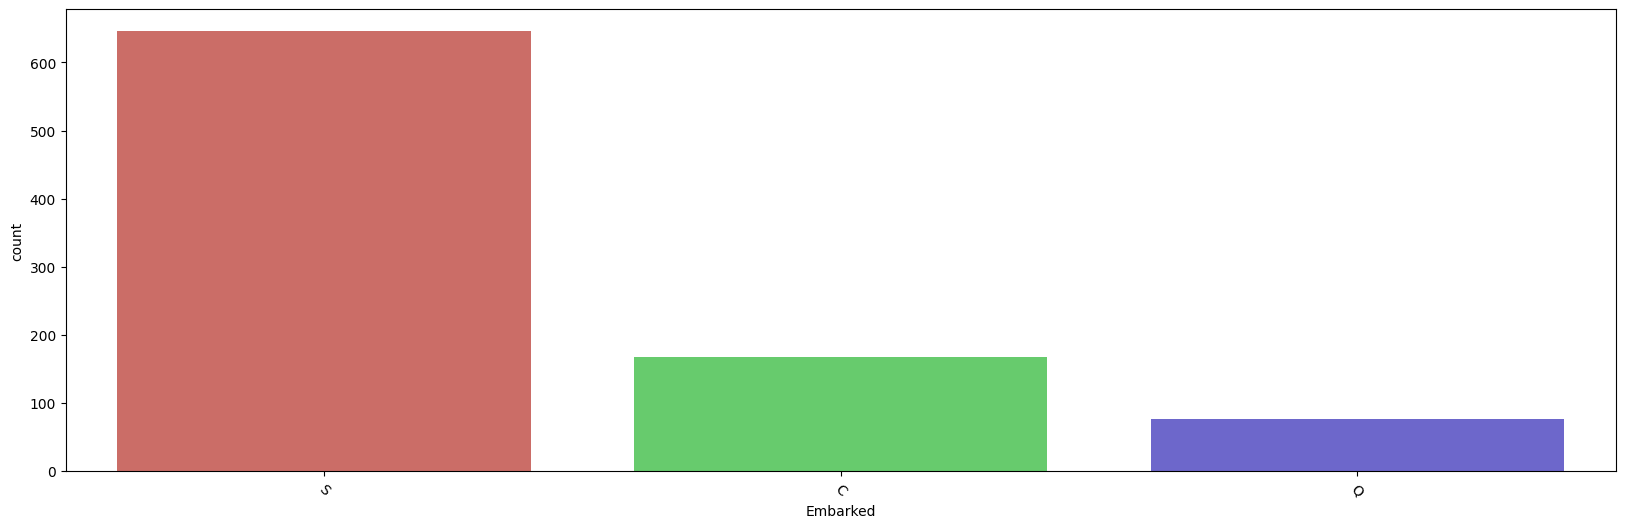

In [ ]:
# #xticks - marks on the x axis
# #palette - color
# for i in object_col:
#   print('counter plot : ', i)
#   plt.figure(figsize = (20, 6))
#   sns.countplot(x = df[i], data = df, palette = 'hls')
#   plt.xticks(rotation = -45)
#   plt.show()
#   print('\n')

Pie plot for :  Sex


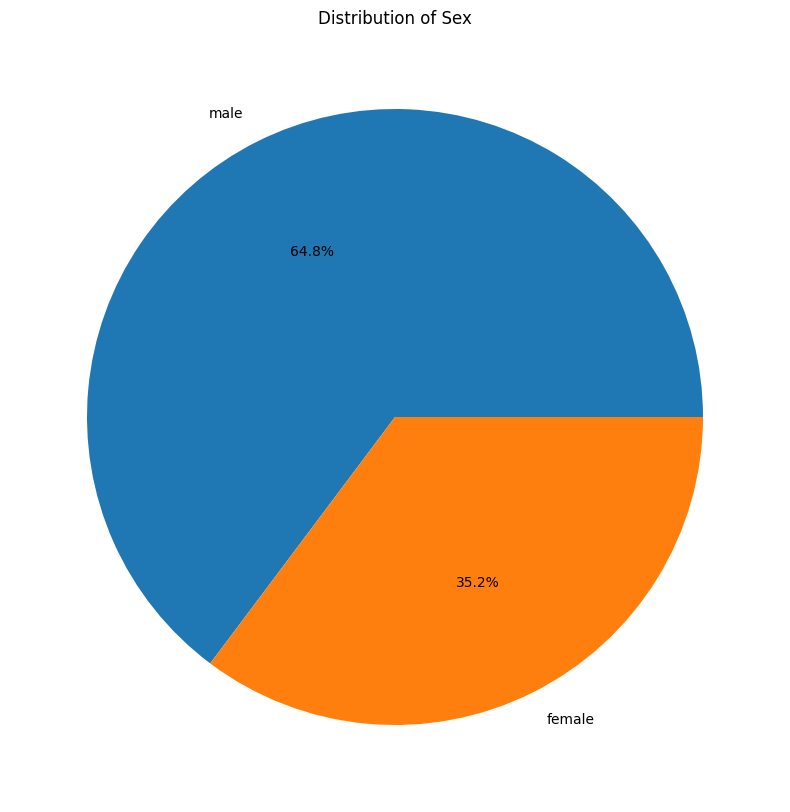



Pie plot for :  Embarked


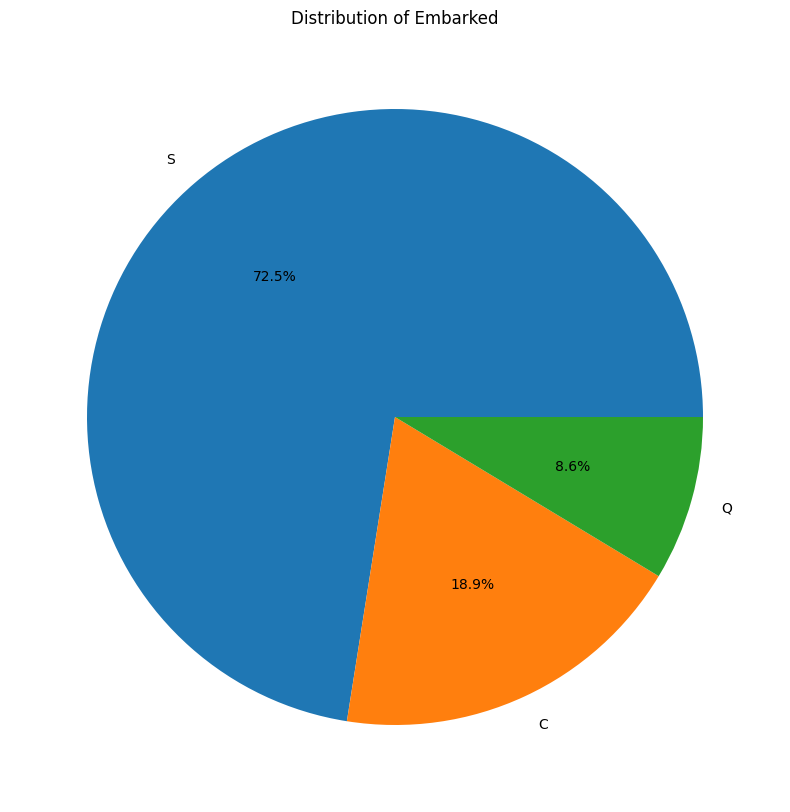

In [ ]:
# for i in object_col:
#   print('Pie plot for : ', i)
#   plt.figure(figsize = (20, 10))
#   df[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
#   plt.title("Distribution of " + i)
#   plt.ylabel('')
#   plt.show()
#   print('\n')

In [ ]:
#count plot using plotly we can use this as reference
for i in object_col:
  fig = go.Figure(data = [go.Bar(x = df[i].value_counts().index, y = df[i].value_counts())])
  fig.update_layout(
      title = i,
      xaxis_title = i,
      yaxis_title = 'Count')
  fig.show()

In [ ]:
#pie plot using plotly we can use this as reference
for i in object_col:
  print('Pie plot for : ', i)
  fig = px.pie(df, names = i, title = 'Distribution of ' + i)
  fig.show()
  print('\n')

Pie plot for :  Sex




Pie plot for :  Embarked


**PLOTS FOR NUMERICAL UNIVARIANT**

counter plot : 


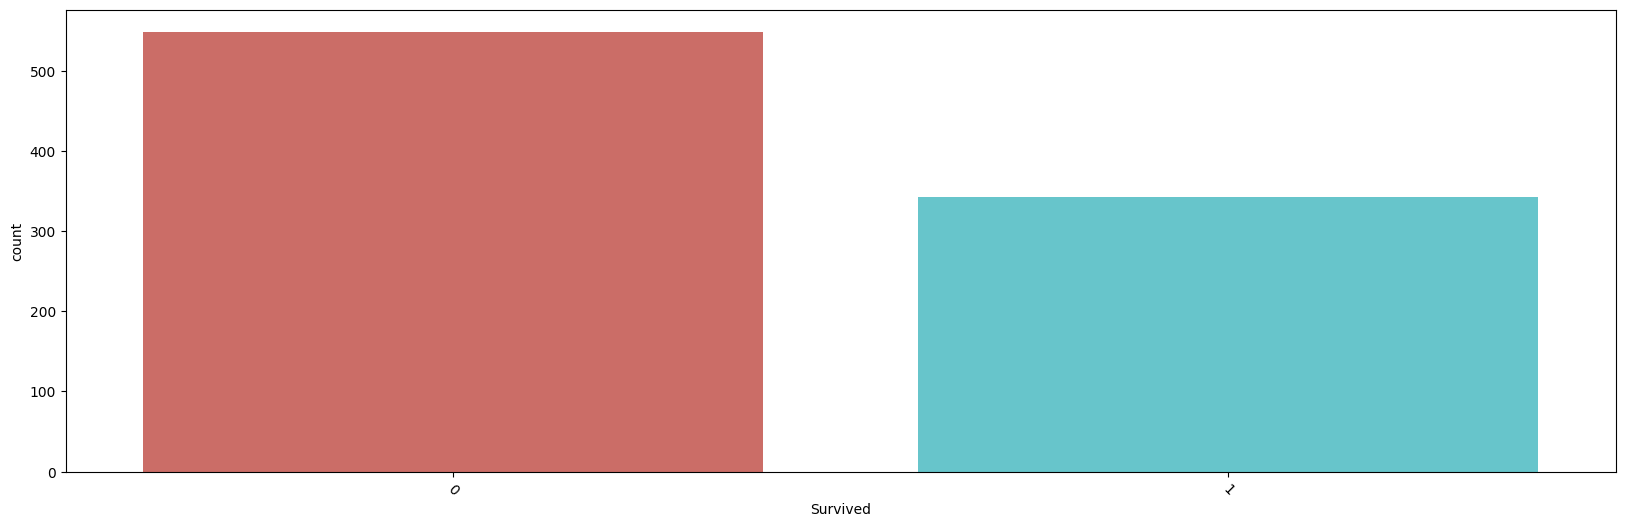

In [ ]:
print('counter plot : ')
plt.figure(figsize = (20, 6))
sns.countplot(x = df['Survived'], data = df, palette = 'hls')
plt.xticks(rotation = -45)
plt.show()
print('\n')

Pie plot for : 


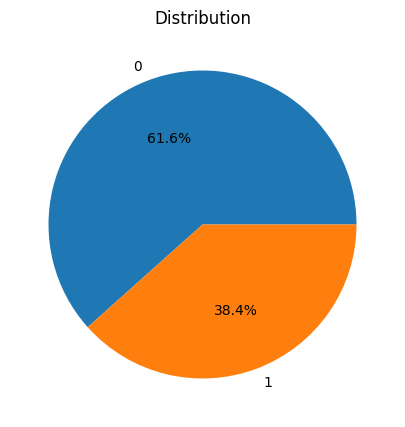

In [ ]:
#making count plot and pie plot for survived because it is having discrete values and histogram is not preferable
#here this value is discrete , we cannot train data with imbalance data so we add synthetic data
print('Pie plot for : ')
plt.figure(figsize = (10, 5))
df['Survived'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title("Distribution")
plt.ylabel('')
plt.show()
print('\n')

Pie plot for : 


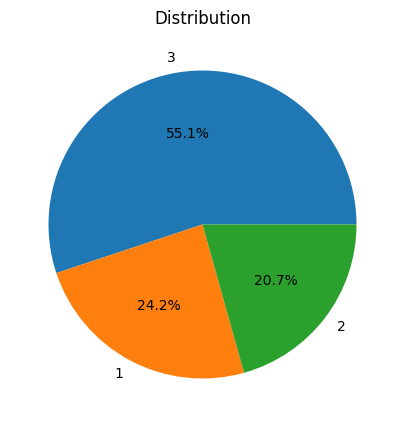

In [ ]:
print('Pie plot for : ')
plt.figure(figsize = (10, 5))
df['Pclass'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title("Distribution")
plt.ylabel('')
plt.show()
print('\n')

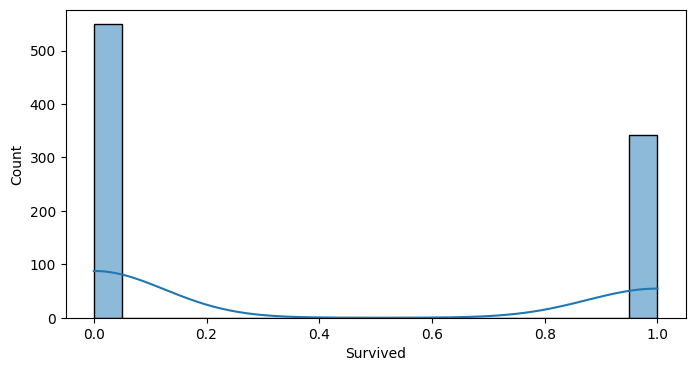

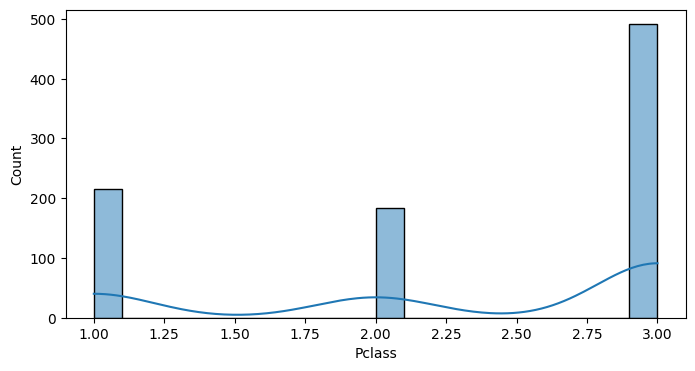

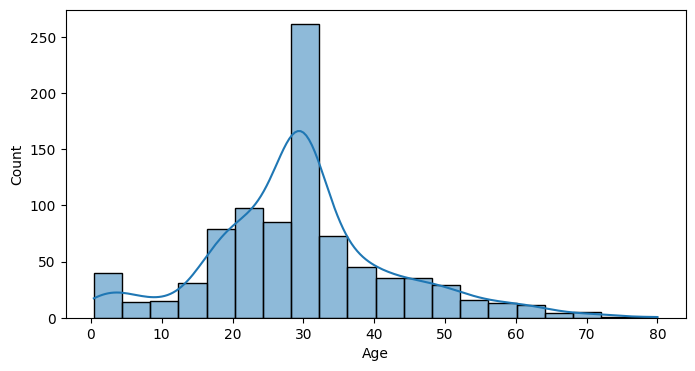

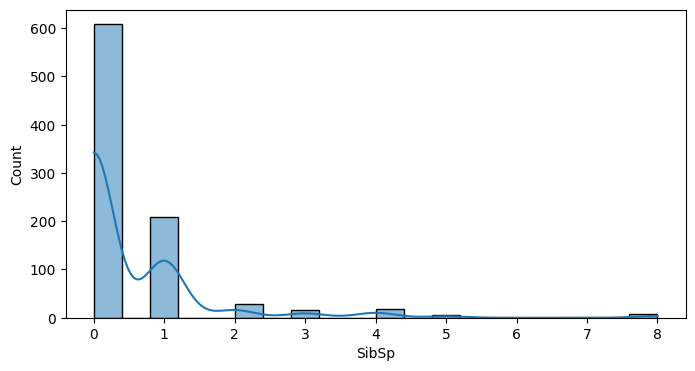

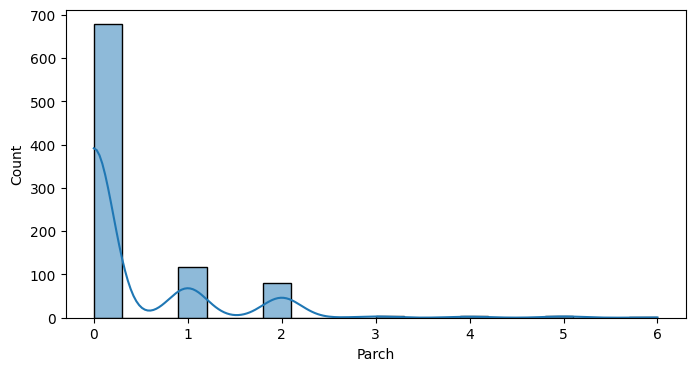

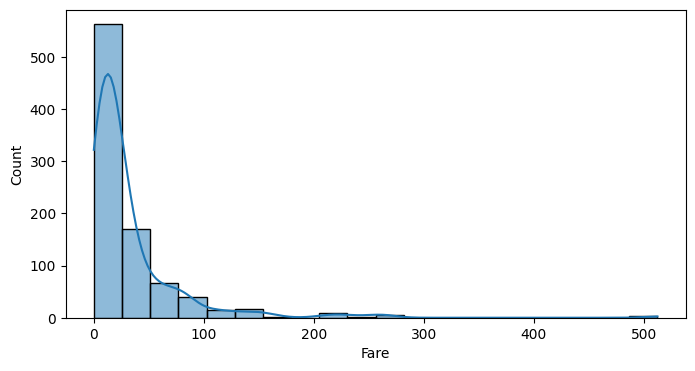

In [ ]:
for i in numeric_col:
  plt.figure(figsize = (8, 4))
  sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
  plt.xticks(rotation = 0)
  plt.show()

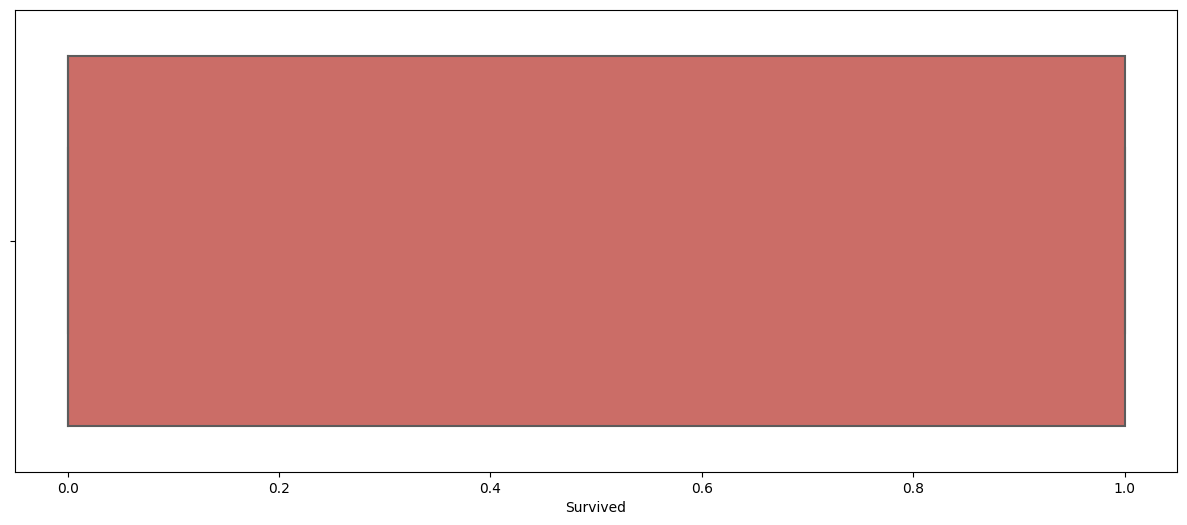

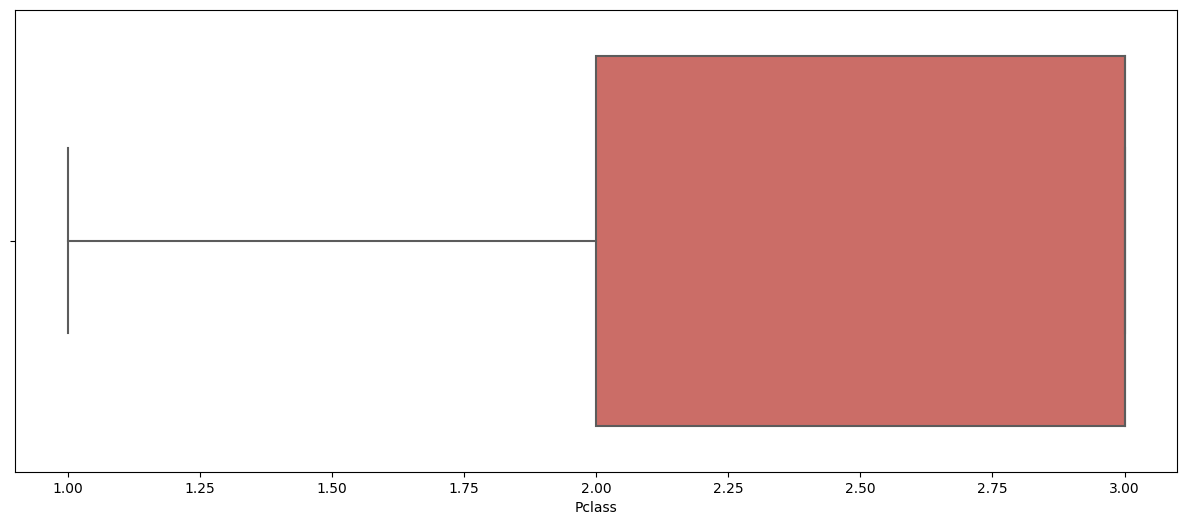

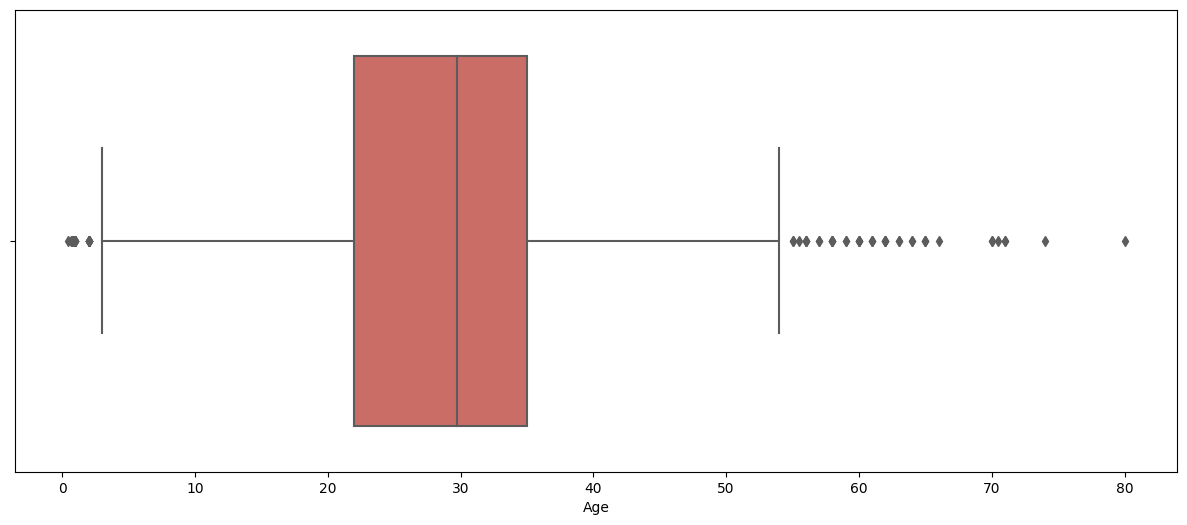

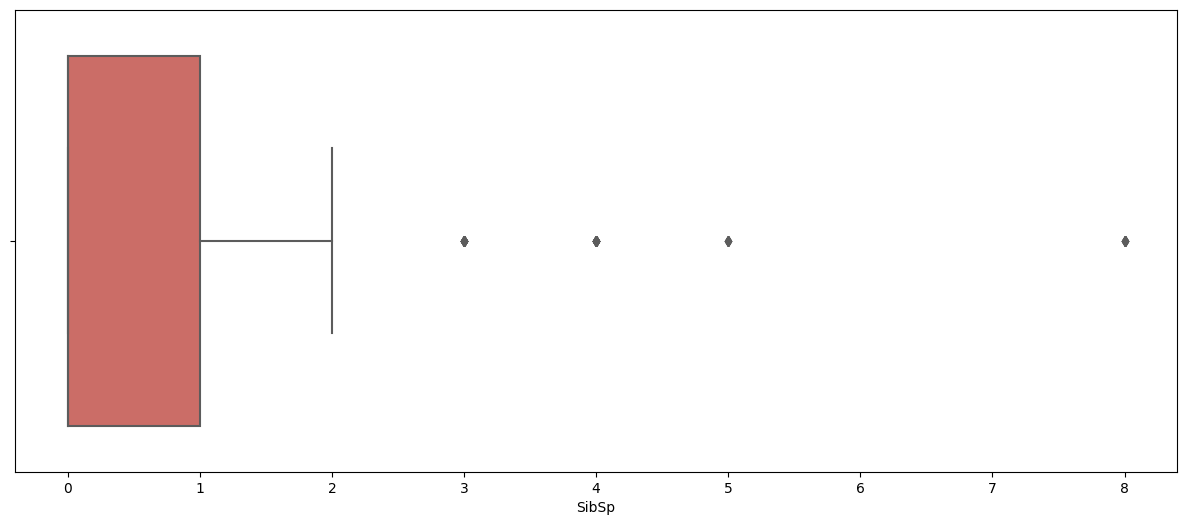

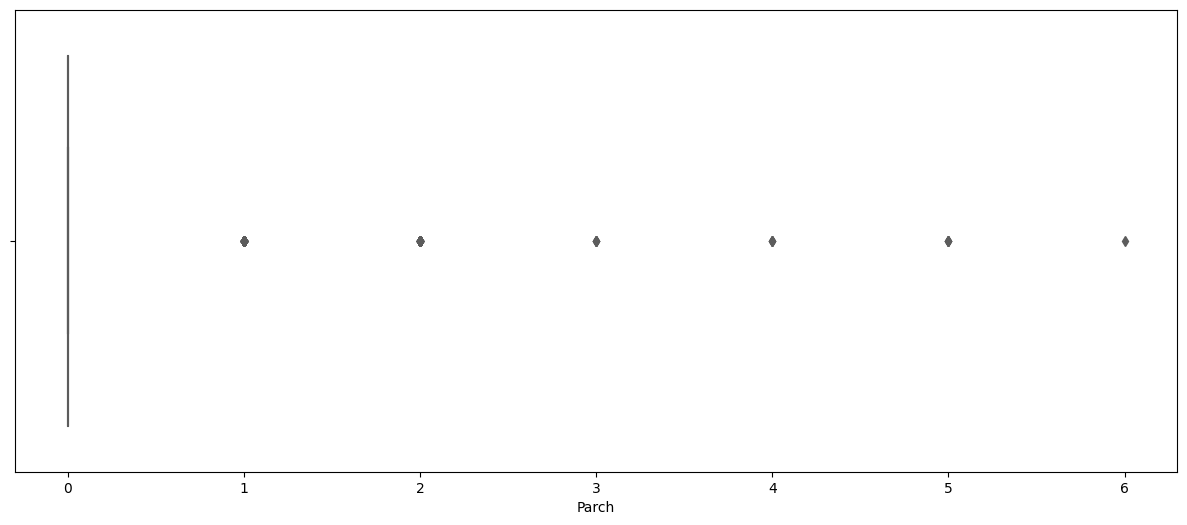

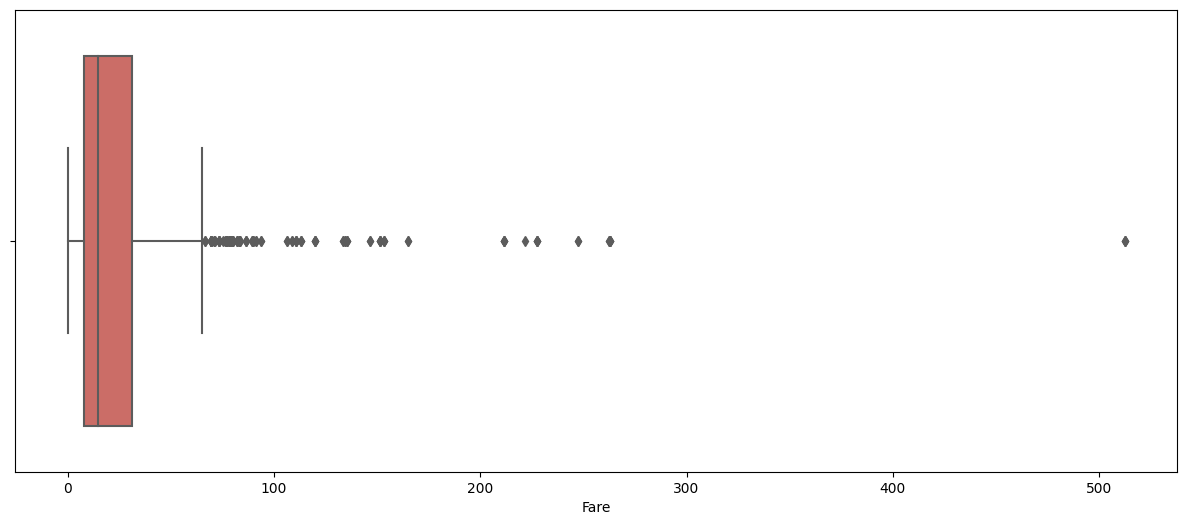

In [ ]:
#box plot is good for age and fare
for i in numeric_col:
  plt.figure(figsize = (15, 6))
  sns.boxplot(x = df[i],data =  df, palette = 'hls')
  plt.xticks(rotation = 0)
  plt.show()

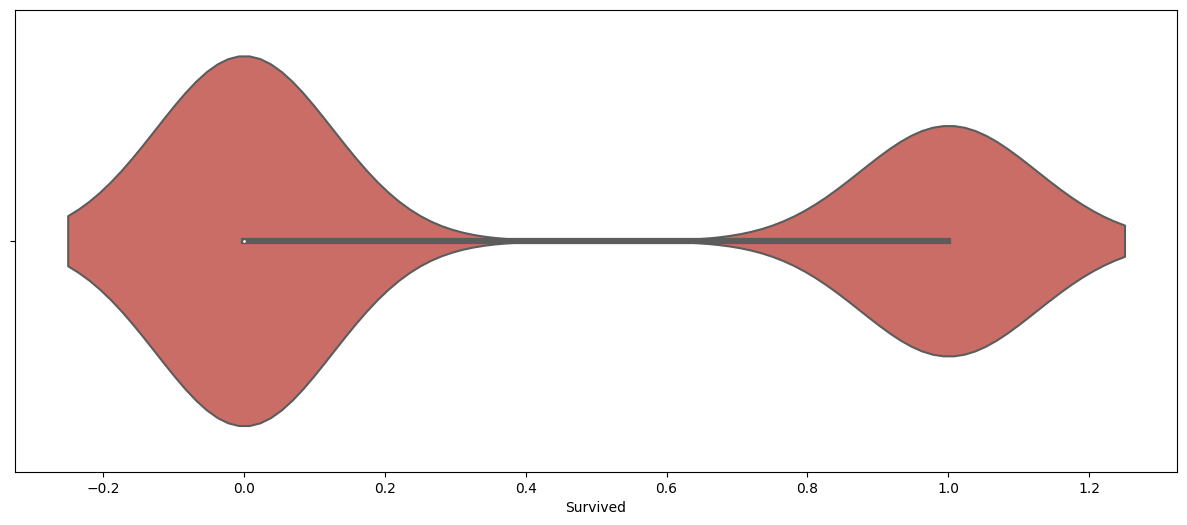

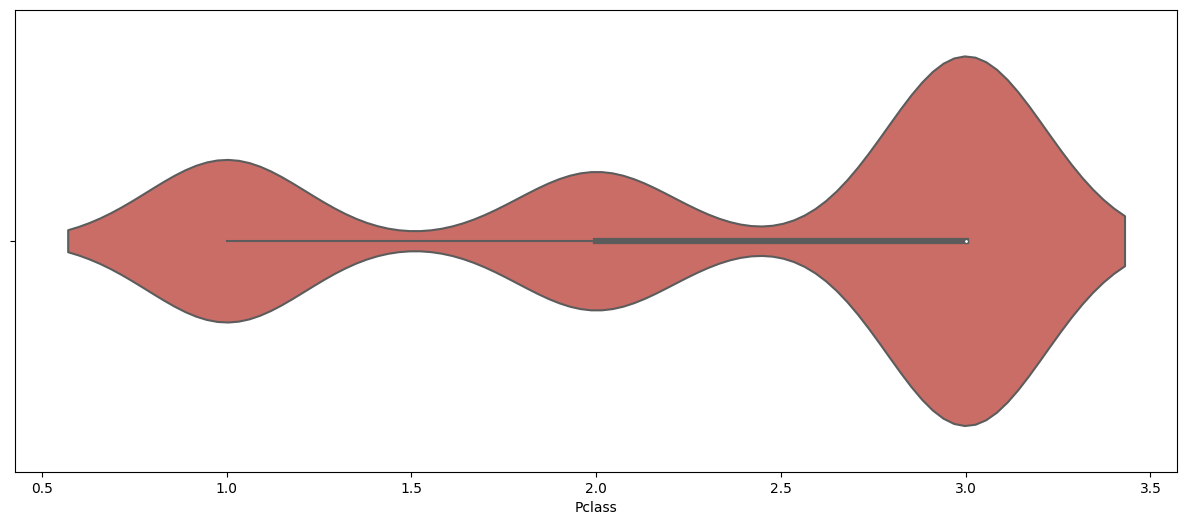

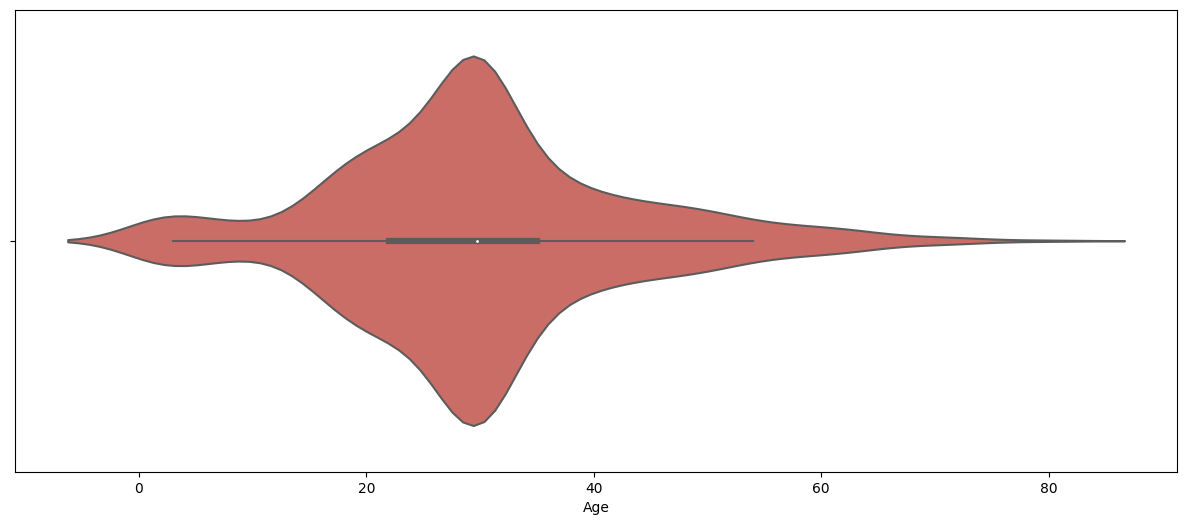

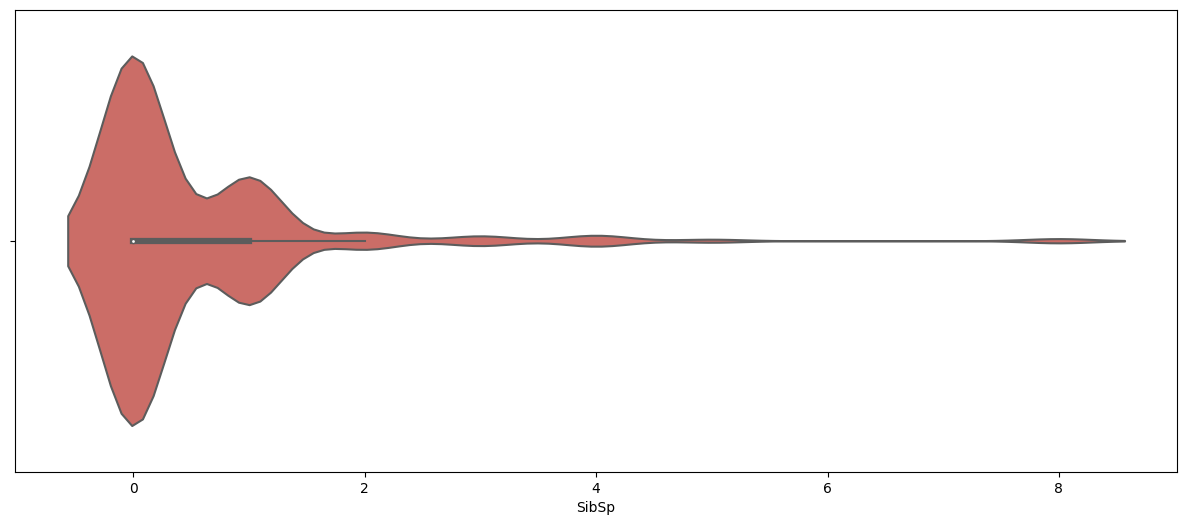

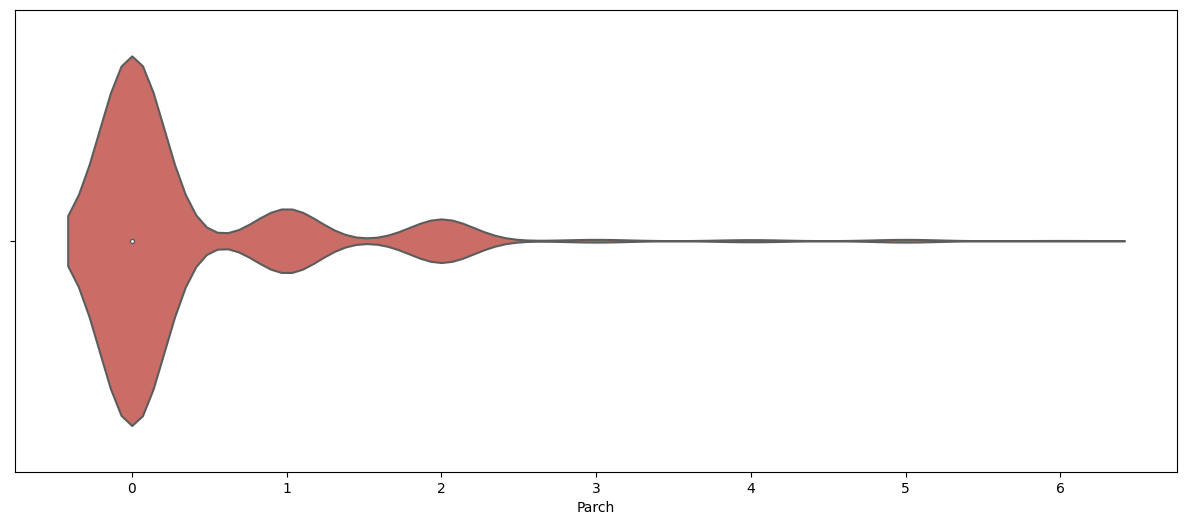

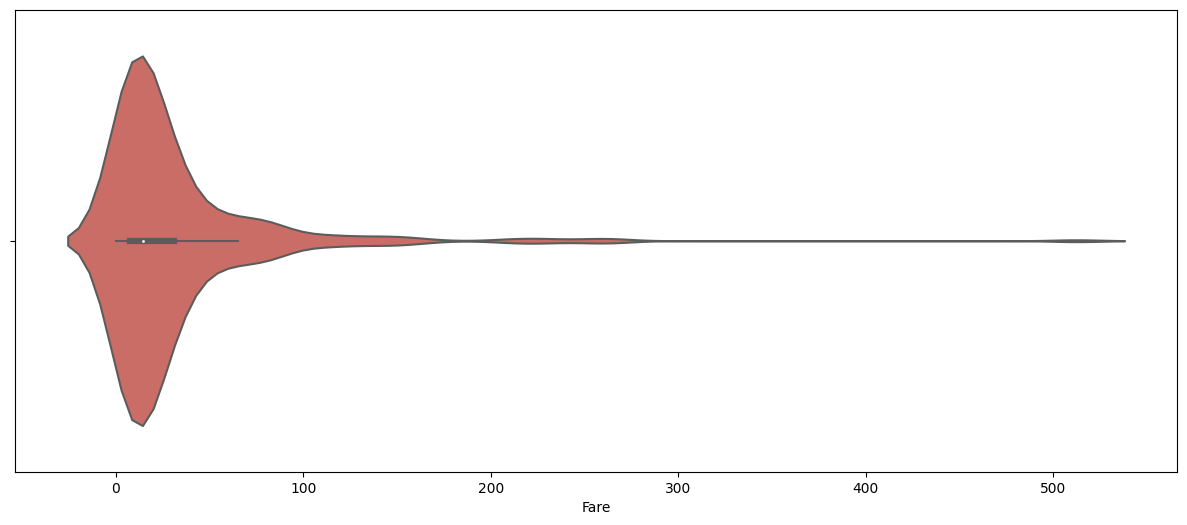

In [ ]:
for i in numeric_col:
  plt.figure(figsize = (15, 6))
  sns.violinplot(x = df[i],data =  df, palette = 'hls')
  plt.xticks(rotation = 0)
  plt.show()

In [ ]:
for i in numeric_col:
  fig = go.Figure(data = [go.Histogram(x = df[i], nbinsx = 20)])
  fig.update_layout(
      title = i,
      xaxis_title = i,
      yaxis_title = "Count")
  fig.show()

**BIVARIANT**

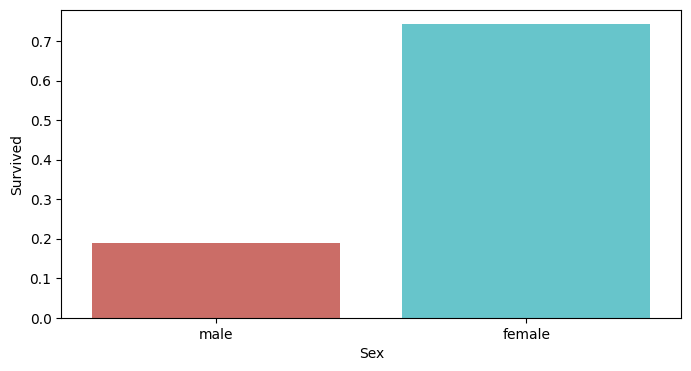

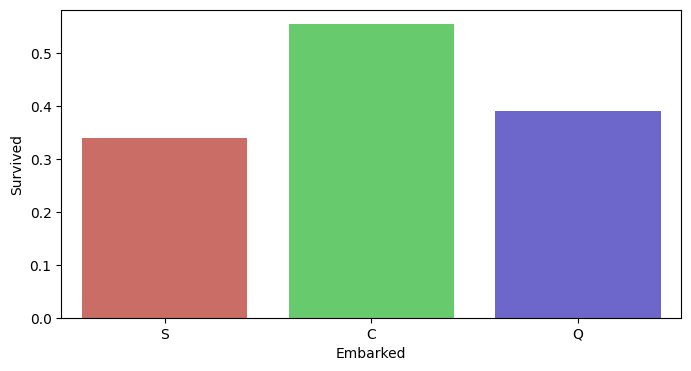

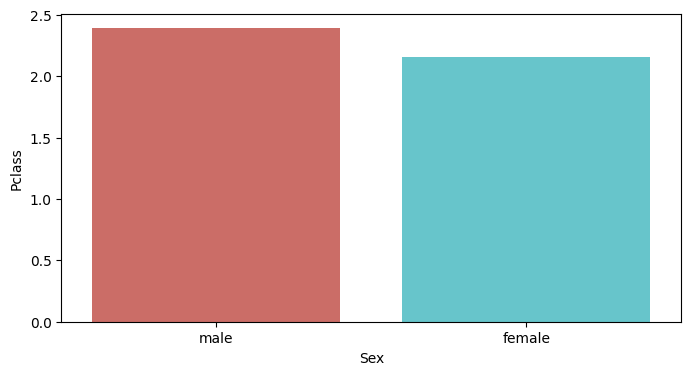

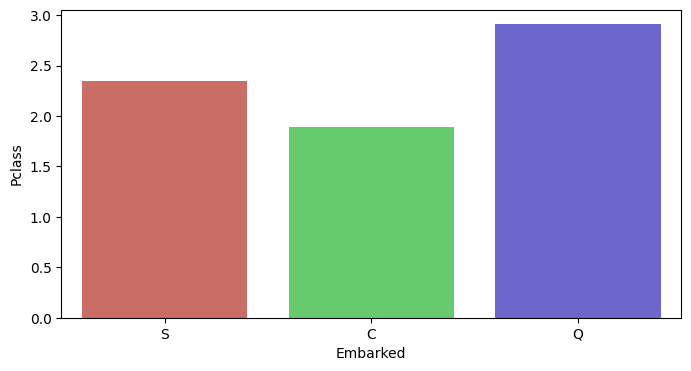

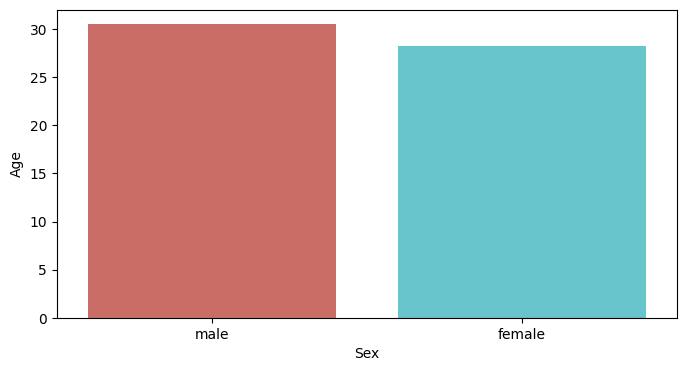

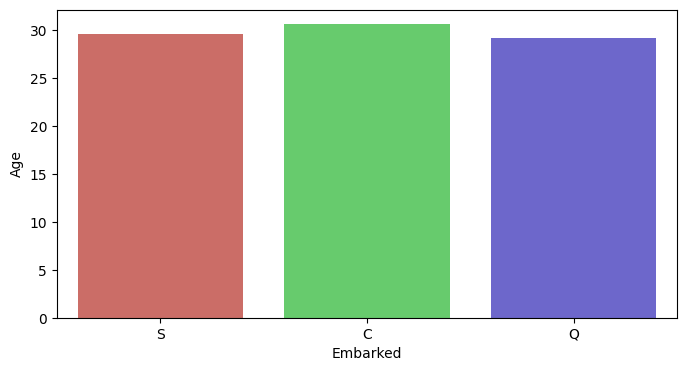

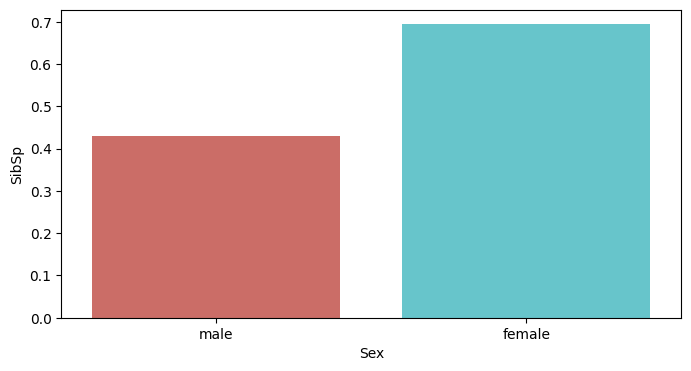

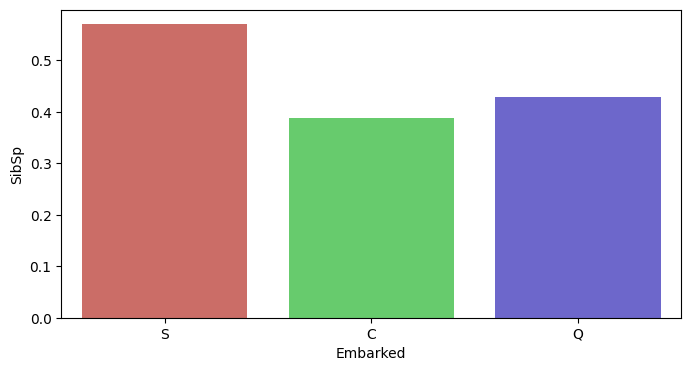

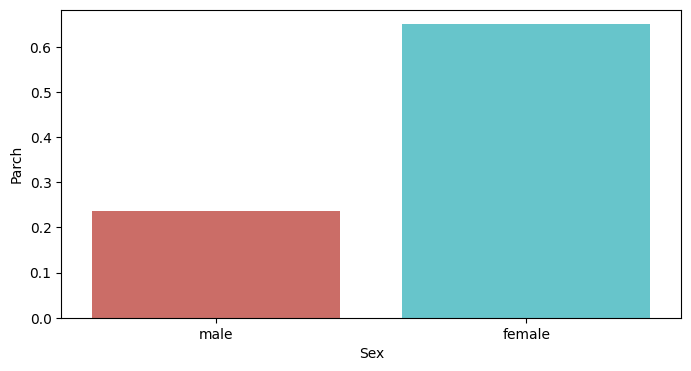

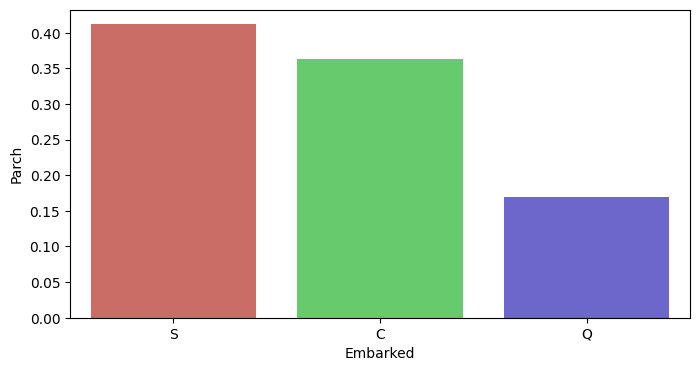

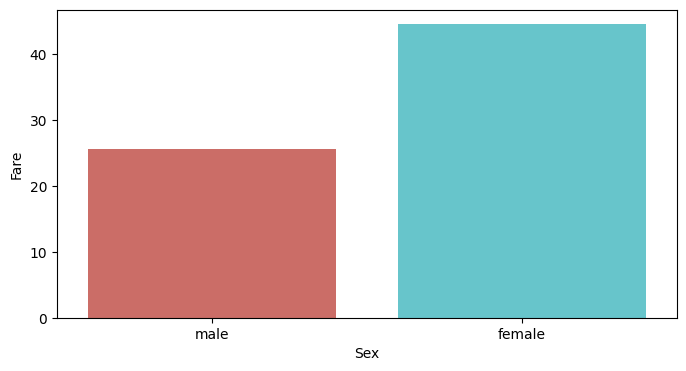

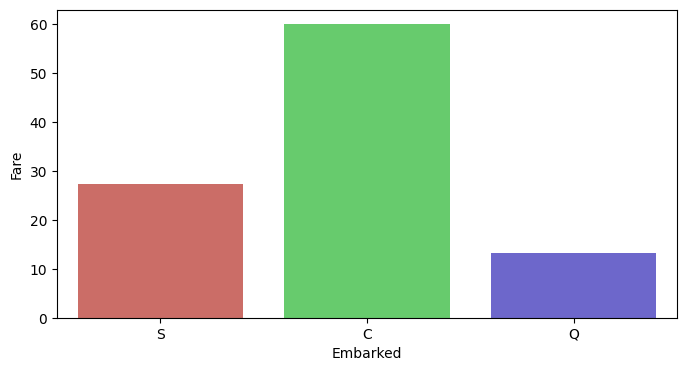

In [ ]:
for i in numeric_col:
  for j in object_col:
    plt.figure(figsize = (8, 4))
    sns.barplot(x = df[j], y = df[i], data = df, ci = None, palette = 'hls')
    plt.show()

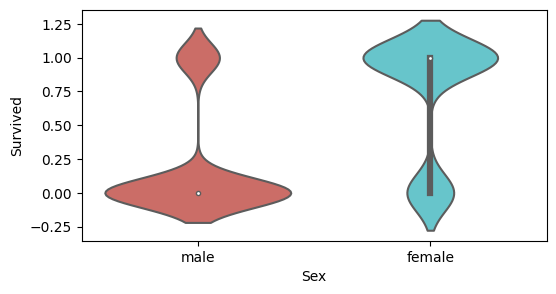

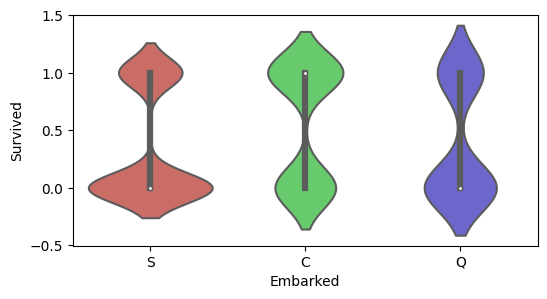

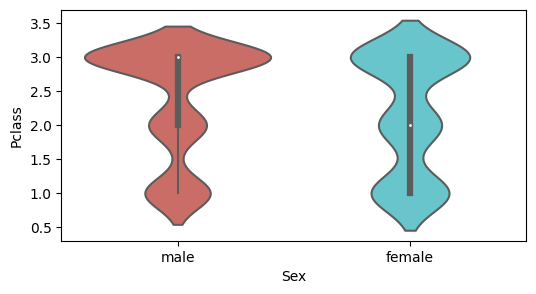

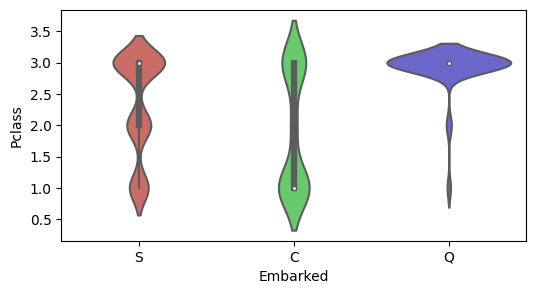

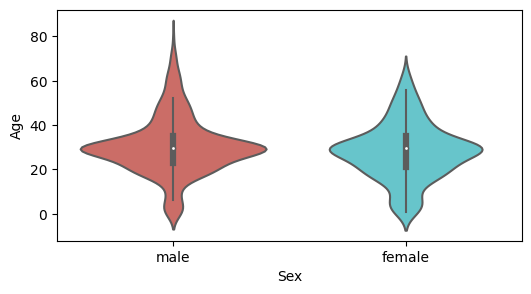

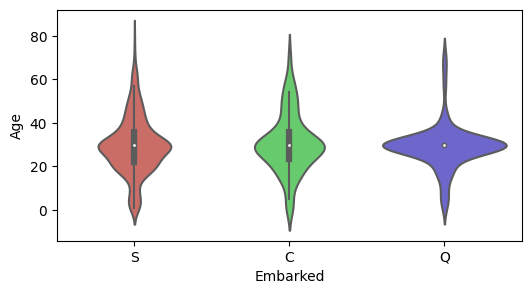

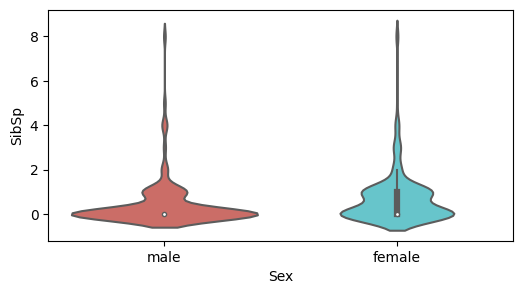

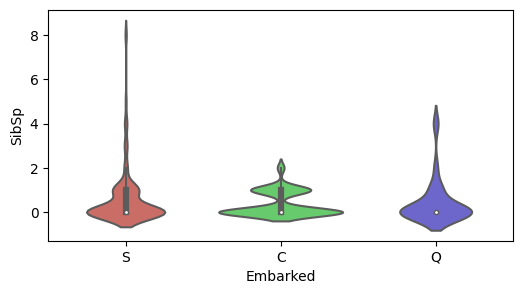

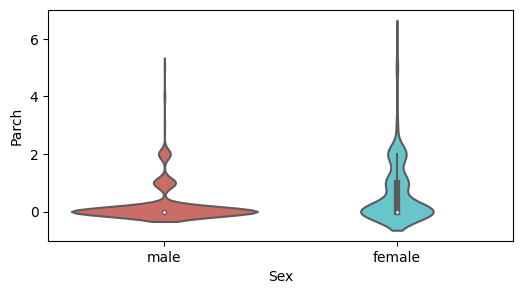

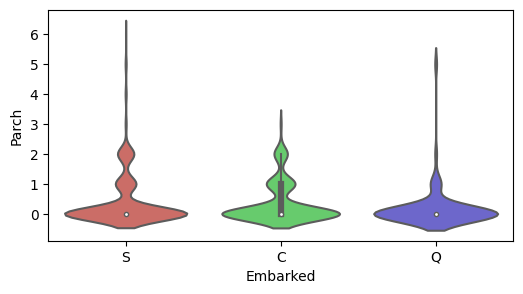

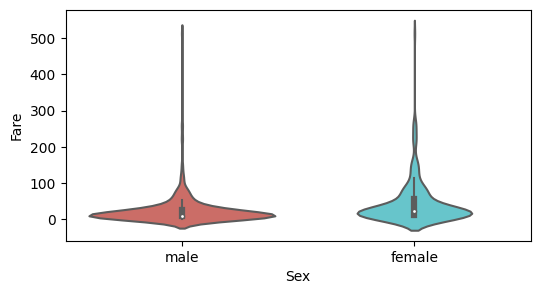

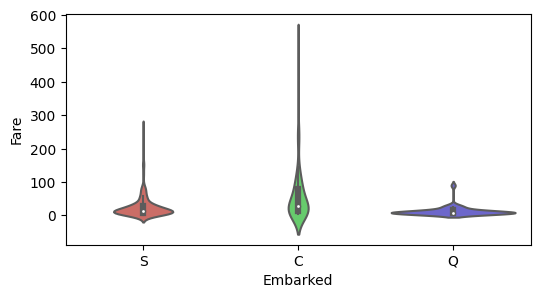

In [ ]:
#in the same way we make box plot and violen plot
for i in numeric_col:
    for j in object_col:
        plt.figure(figsize = (6,3))
        sns.violinplot(x = df[j],y = df[i], data = df,palette = 'hls')
        plt.show()

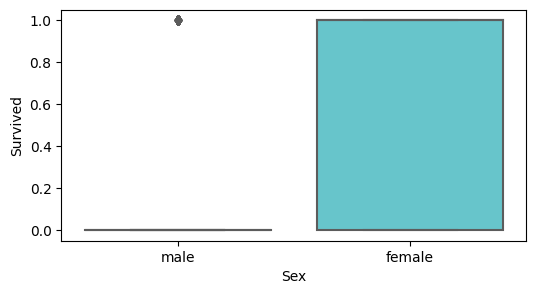

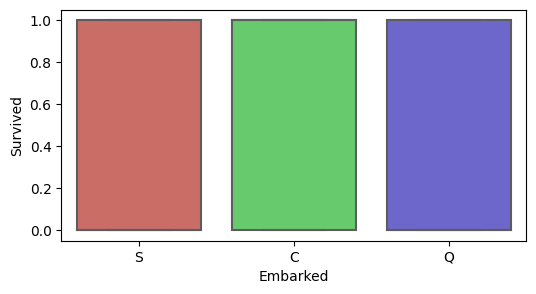

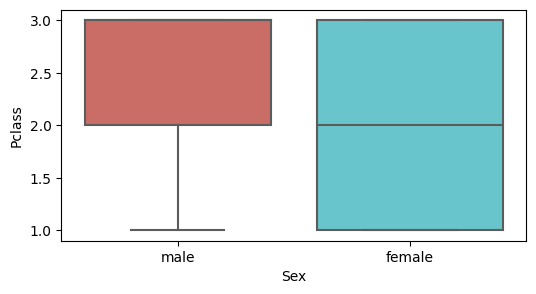

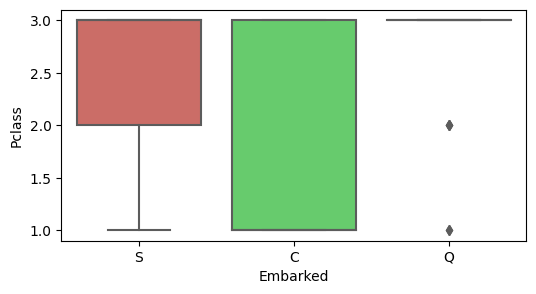

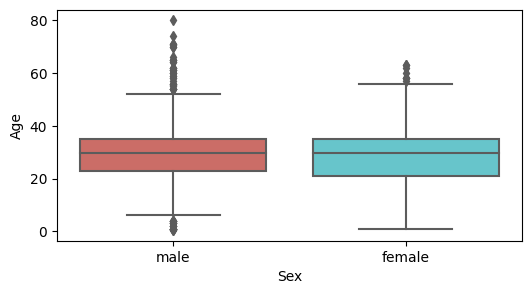

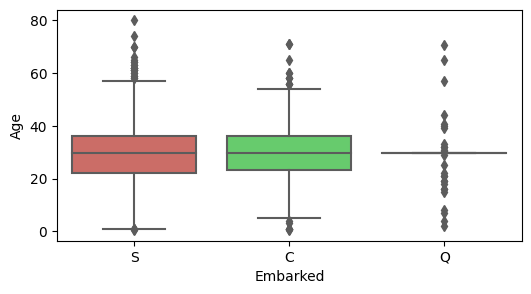

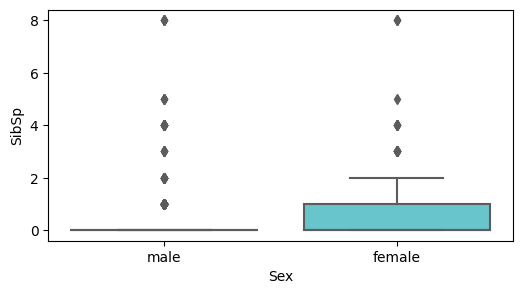

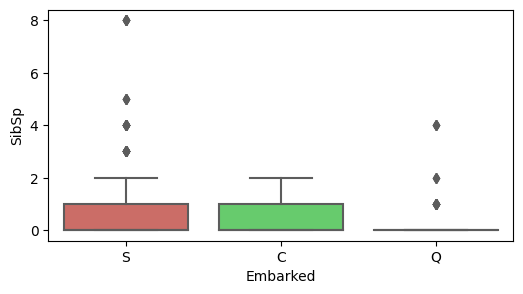

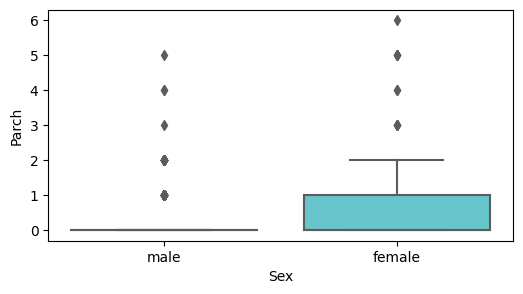

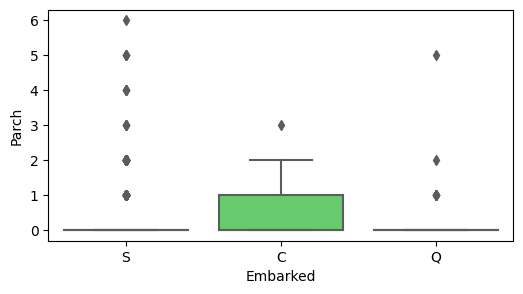

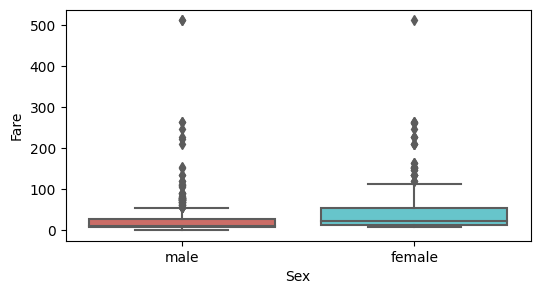

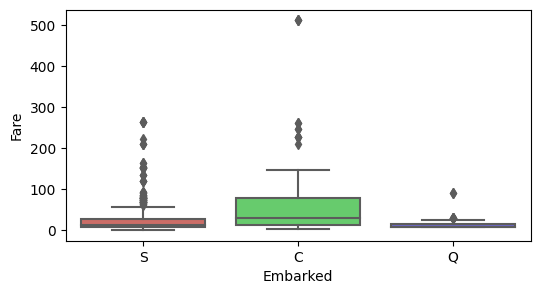

In [ ]:
#in the same way we make box plot and violen plot
for i in numeric_col:
    for j in object_col:
        plt.figure(figsize = (6,3))
        sns.boxplot(x = df[j],y = df[i], data = df,palette = 'hls')
        plt.show()

In [ ]:
pd.pivot_table(df, index = 'Survived', values = ['Age', 'SibSp', 'Pclass', 'Parch', 'Fare'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.415100,22.117887,0.329690,2.531876,0.553734
1,28.549778,48.395408,0.464912,1.950292,0.473684


In [ ]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [ ]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [ ]:
df1 = pd.get_dummies(df, columns = object_col, drop_first = True)
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [ ]:
#created dummies scaled two features by minmax scaler and next modelling
# here inspite of standardscalar we are using minmax scaler because the range is -1 to 1
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [ ]:
columns_to_scale = ['Age', 'Fare']

In [ ]:
df1[columns_to_scale] = scalar.fit_transform(df1[columns_to_scale])
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,0.271174,1,0,0.014151,1,0,1
1,1,1,0.472229,1,0,0.139136,0,0,0
2,1,3,0.321438,0,0,0.015469,0,0,1
3,1,1,0.434531,1,0,0.103644,0,0,1
4,0,3,0.434531,0,0,0.015713,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0.334004,0,0,0.025374,1,0,1
887,1,1,0.233476,0,0,0.058556,0,0,1
888,0,3,0.367921,1,2,0.045771,0,0,1
889,1,1,0.321438,0,0,0.058556,1,0,0


In [ ]:
x = df1.drop('Survived', axis = 1)
y = df1['Survived']

In [ ]:
#traing and testing model
#train then fit in model next test and check accuracy
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify = y, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score, confusion_matrix, recall_score, precision_recall_fscore_support
precision = precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
scores = precision_recall_fscore_support(y_test, y_pred)

In [ ]:
print(precision)
print(confusion)
print(scores)
print(recall)

0.7931034482758621
[[98 12]
 [23 46]]
(array([0.80991736, 0.79310345]), array([0.89090909, 0.66666667]), array([0.84848485, 0.72440945]), array([110,  69]))
0.6666666666666666


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
dt_score = accuracy_score(y_test, y_pred_dt)

In [ ]:
print(dt_score)

0.7932960893854749


here we will the aacuracy of logistic is more as compared to decision tree to we consider logistic regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier()

In [ ]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8044692737430168

In [ ]:
from sklearn.metrics import precision_score, confusion_matrix, recall_score, precision_recall_fscore_support
precision = precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
scores = precision_recall_fscore_support(y_test, y_pred)

NameError: ignored

In [ ]:
print(precision)
print(confusion)
print(scores)

0.7931034482758621
[[98 12]
 [23 46]]
(array([0.80991736, 0.79310345]), array([0.89090909, 0.66666667]), array([0.84848485, 0.72440945]), array([110,  69]))
